In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

## Loading and REading 

In [6]:
### Parameters for DAS 
sample_rate = 25
dchan = 9.5714
ch_max = 4500  # max channel of each cable (4500 or 6000)
ch_itv=2  # channels are downsampled for faster picking

### Directories and files
raw_dir = '/fd1/QibinShi_data/akdas/qibin_data/'
out_dir = raw_dir + 'largerEQ_plots_test_picking_dec_ch' + str(ch_max) + '/'
record_time_file = 'recording_times_larger.csv'
qml = raw_dir + 'ak_Dec1_31_a120b065.xml'

In [7]:
### Read phase picks from the previous session
with h5py.File(out_dir + 'phase_picks.hdf5', 'r') as f: #filepaths should be 
    raw_picks = f["raw_alldata_picks"][:]
    one_picks = f["one_denoise_picks"][:]
    mul_picks = f["mul_denoise_picks"][:]
    pred_picks = f["predicted_picks"][:]
    array_dist = f["array_dist"][:]
    
### Read raw and denoised DAS
with h5py.File(raw_dir + 'KKFLStill2024_02_24.hdf5', 'r') as f:
    raw_quake_kkfls = f["raw_quake"][:, :4500, :] # original could be 500:5000, check 
    fk_quake_kkfls = f["fk_quake"][:, :4500, :]

with h5py.File(raw_dir + 'TERRAtill2024_02_24.hdf5', 'r') as f:
    raw_quake_terra = f["raw_quake"][:, :4500, :]
    fk_quake_terra = f["fk_quake"][:, :4500, :]


In [19]:
savedir = "/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/"

In [ ]:
#save one_picks as a csv
np.savetxt(savedir + 'one_picks.csv', mul_picks[:,:,1, 0], delimiter=',', fmt='%s')


In [13]:
raw_quake_kkfls.shape
raw_quake_terra.shape

#flip the terra data on the channel axis, the number of ea
quakes = np.concatenate((raw_quake_kkfls[:, ::-1, :], raw_quake_terra), axis=1)


In [14]:
quakes.shape

(95, 9000, 1500)

In [15]:
pred_picks.shape

(95, 4500, 2)

In [16]:
sampling_rate = 25 # hz

In [17]:
### Bandpass filter
b, a = butter(4, (0.5, 12), fs=sampling_rate, btype='bandpass')
filt = filtfilt(b, a, quakes, axis=2)
rawdata = filt / np.std(filt, axis=(1,2), keepdims=True)  ## Rawdata w.r.t. Denoised 

In [ ]:
#print(highpass_quakes.shape)

In [27]:
plt.figure(figsize=(10, 6))

for i in range(0,95):
    plt.imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
    plt.scatter(pred_picks[i,:,1]*25, np.arange(0,9000, 2))
    plt.savefig(savedir + "pred_picks/" + 'predpick_' + str(i) + '.png')
    plt.close()



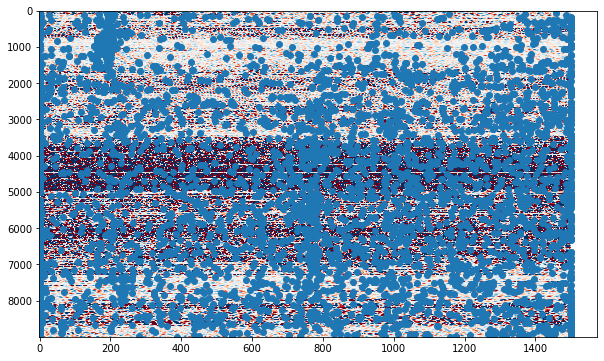

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(rawdata[45, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")

plt.scatter(one_picks[45,:,1,0]*25, np.arange(0,9000, 2))



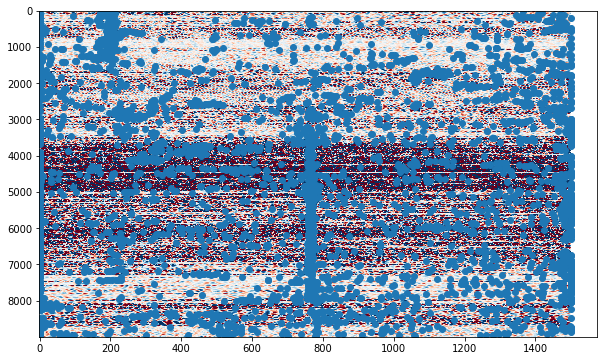

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(rawdata[45, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")

plt.scatter(mul_picks[45,:,1,0]*25, np.arange(0,9000, 2))



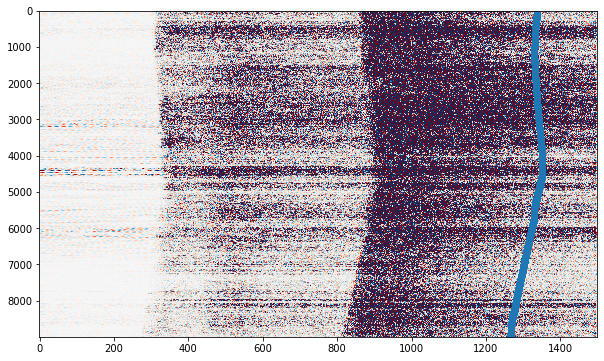

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(rawdata[32, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")

plt.scatter(pred_picks[32,:,1]*25, np.arange(0,9000, 2))

